In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, AveragePooling2D, UpSampling2D, Cropping2D,Dropout
from keras.models import Model
from keras import backend as K
import matplotlib .pyplot as plt
import numpy as np

Using TensorFlow backend.


In [0]:
data_set = np.load('img_numpy.npy')
print(data_set.shape)

In [0]:
## trainsform numpy to list to use pop 
pass_data = list(data_set)
fail_data = []
for i in [2605, 2603, 2596, 2495, 2442, 2393, 2211, 1905, 1119]:   ## 뒤에 인덱스부터 pop해줘야 인덱스가 엉키지 않는다!!!
    a = pass_data.pop(i-1)
    fail_data.append(a)

In [0]:
import random

pass_test = []

rlist = np.array(2862)

rand_num = np.random.choice(rlist, 100, replace=False)
print(rand_num)
rand_num = list(rand_num)
rand_num.sort(reverse=True)
print(rand_num)
rand_num.sort(reverse=True)
for i in rand_num:
  a = pass_data.pop(i)
  pass_test.append(a)

[1071   88   33 1877 1552  314 1128 1214 1193  663 1726 1793  175 2438
  498 1591 1851 2776 2413  294 2389 2348 1937 1708  374   80  616 2860
 1198 1537  532  180 2600 2760  595  626 1381 1598  787  585  990 2024
 2409   92 1064 2367 1830  875 2806 1243 2253 1307 1477  208 2471 2098
 1099 1190 1299  873 1143  778 2481  855 2475  433 1881 1696  963 1577
 1666  388  179  185 1539  925 2741  131 1654  392 1324  225  347 1183
 2073 2094 2277 2165 2859 2570 1363  879 1510 2124 1205 1200 2461 2203
 1145  803]
[2860, 2859, 2806, 2776, 2760, 2741, 2600, 2570, 2481, 2475, 2471, 2461, 2438, 2413, 2409, 2389, 2367, 2348, 2277, 2253, 2203, 2165, 2124, 2098, 2094, 2073, 2024, 1937, 1881, 1877, 1851, 1830, 1793, 1726, 1708, 1696, 1666, 1654, 1598, 1591, 1577, 1552, 1539, 1537, 1510, 1477, 1381, 1363, 1324, 1307, 1299, 1243, 1214, 1205, 1200, 1198, 1193, 1190, 1183, 1145, 1143, 1128, 1099, 1071, 1064, 990, 963, 925, 879, 875, 873, 855, 803, 787, 778, 663, 626, 616, 595, 585, 532, 498, 433, 392, 388, 

In [0]:
## retransform to numpy
pass_test = np.array(pass_test)
pass_data = np.array(pass_data)
fail_data = np.array(fail_data)
print(type(pass_data), pass_data.shape)
print(type(pass_test), pass_test.shape)
print(type(fail_data), fail_data.shape)

<class 'numpy.ndarray'> (2762, 266, 410)
<class 'numpy.ndarray'> (100, 266, 410)
<class 'numpy.ndarray'> (9, 266, 410)


In [0]:
## attech pass_test to fail_data and make test_data
test_data = np.concatenate((fail_data, pass_test)) ## forward 9 fail, backward 9 pass
print(test_data.shape)

(109, 266, 410)


In [0]:
## test & train data preprocessing
train_data = pass_data[:,:,:]

train_data = train_data.reshape((-1, 266, 410, 1)) # 266, 410
train_data = train_data.astype('float32') / 255.

test_data = test_data.reshape((-1,266, 410,1))
test_data = test_data.astype('float32') / 255.

In [0]:
from keras import optimizers
input_img = Input(shape=(266, 410, 1)) 
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Dropout(0.2)(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = Dropout(0.2)(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid')(x)
                                                    #decoded = Cropping2D(cropping=((0, 0), (3, 0)), data_format=None)(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 266, 410, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 266, 410, 8)       80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 133, 205, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 133, 205, 16)      1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 67, 103, 16)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 67, 103, 32)       4640      
_________________________________________________________________
dropout_1 (Dropout)          (None, 67, 103, 32)       0   

In [0]:
history= autoencoder.fit(train_data, train_data,
                epochs=50,
                shuffle=True,
                batch_size=64,
                )

Epoch 1/50
2762/2762 [==============================] - 23s 8ms/step - loss: 0.5573
Epoch 2/50
2762/2762 [==============================] - 15s 5ms/step - loss: 0.5110
Epoch 3/50
2762/2762 [==============================] - 15s 5ms/step - loss: 0.5024
Epoch 4/50
2762/2762 [==============================] - 15s 5ms/step - loss: 0.4979
Epoch 5/50
2762/2762 [==============================] - 15s 5ms/step - loss: 0.4959
Epoch 6/50
2762/2762 [==============================] - 15s 5ms/step - loss: 0.4949
Epoch 7/50
2762/2762 [==============================] - 15s 5ms/step - loss: 0.4944
Epoch 8/50
2762/2762 [==============================] - 15s 5ms/step - loss: 0.4940
Epoch 9/50
2762/2762 [==============================] - 15s 5ms/step - loss: 0.4937
Epoch 10/50
2762/2762 [==============================] - 15s 5ms/step - loss: 0.4936
Epoch 11/50
2762/2762 [==============================] - 15s 5ms/step - loss: 0.4934
Epoch 12/50
2762/2762 [==============================] - 15s 5ms/step - lo

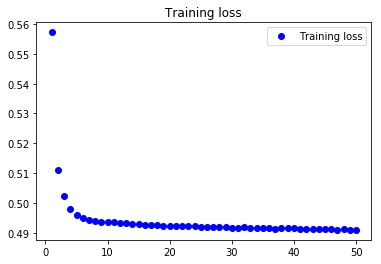

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss'] 


epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss') 

plt.title('Training loss') 
plt.legend()

plt.show()

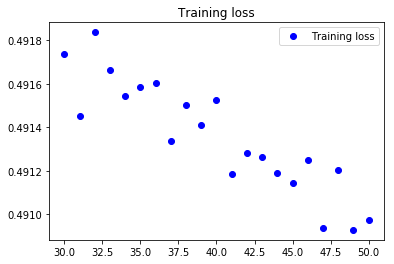

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss'] 


epochs = range(30, len(loss) + 1)

plt.plot(epochs, loss[29:], 'bo', label='Training loss') 

plt.title('Training loss') 
plt.legend()

plt.show()

In [0]:
#autoencoder.save('/No.val_MSE_32,64L_epoch100_drop0.2.hdf5')

In [0]:
#from keras.models import load_model
#autoencoder = load_model('/32_16_valsp0.2_MSE_epoch100.hdf5')

In [0]:
data_test_pass = test_data[9:,:,:]
data_test_fail = test_data[:9,:,:]


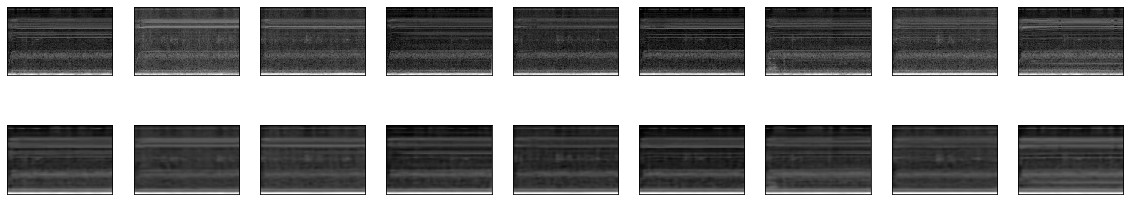

In [0]:
#test - pass
import matplotlib.pyplot as plt
p_decoded_imgs = autoencoder.predict(data_test_pass)

n = 9  # 몇 개의 숫자를 나타낼 것인지
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 데이터
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(data_test_pass[i].reshape(266, 410)) #224, 341
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 재구성된 데이터
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(p_decoded_imgs[i].reshape(266, 410))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
test_loss = autoencoder.evaluate(data_test_pass, data_test_pass)
print(test_loss)

100/100 [==============================] - 0s 3ms/step
0.48473540306091306


In [0]:
data_test_pass1 = data_test_pass[:,np.newaxis,:,:,:]
print(data_test_pass1.shape)
print(data_test_pass1[0].shape)

(100, 1, 266, 410, 1)
(1, 266, 410, 1)


In [0]:
hist=[]
for i in range(100):
    test_loss_1 = autoencoder.evaluate(data_test_pass1[i],data_test_pass1[i])
    print(test_loss_1)
    hist.append(test_loss_1)
    

1/1 [==============================] - 0s 112ms/step
0.4798811376094818
1/1 [==============================] - 0s 4ms/step
0.5870541930198669
1/1 [==============================] - 0s 4ms/step
0.5402717590332031
1/1 [==============================] - 0s 5ms/step
0.44135230779647827
1/1 [==============================] - 0s 5ms/step
0.48593488335609436
1/1 [==============================] - 0s 5ms/step
0.4226677715778351
1/1 [==============================] - 0s 5ms/step
0.4800258278846741
1/1 [==============================] - 0s 5ms/step
0.5475277304649353
1/1 [==============================] - 0s 4ms/step
0.51146000623703
1/1 [==============================] - 0s 4ms/step
0.4450056254863739
1/1 [==============================] - 0s 4ms/step
0.4751451313495636
1/1 [==============================] - 0s 4ms/step
0.49409809708595276
1/1 [==============================] - 0s 5ms/step
0.5661711692810059
1/1 [==============================] - 0s 4ms/step
0.5251956582069397
1/1 [============

(array([ 4.,  7.,  5., 13.,  8., 13., 11., 14., 18.,  7.]),
 array([0.34432086, 0.36878814, 0.39325541, 0.41772269, 0.44218996,
        0.46665724, 0.49112451, 0.51559179, 0.54005906, 0.56452633,
        0.58899361]),
 <a list of 10 Patch objects>)

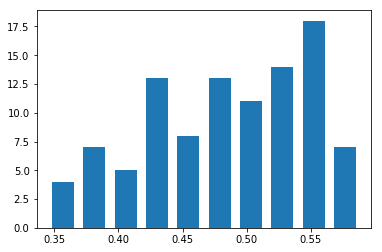

In [0]:
plt.hist(hist, rwidth = 0.7)

In [0]:
dp2 = pow(data_test_pass - p_decoded_imgs,2)
dp = dp2**0.5
print(dp.shape)

(100, 266, 410, 1)


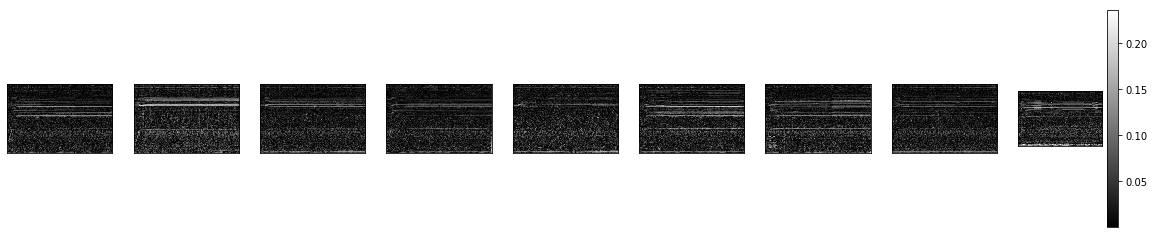

In [0]:
n = 9  # 몇 개의 숫자를 나타낼 것인지
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 데이터
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(dp[i].reshape(266,410))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.figure(1)
plt.colorbar()

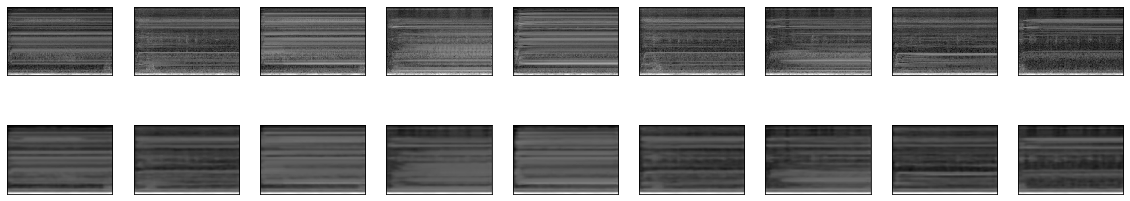

In [0]:
#test - fail
import matplotlib.pyplot as plt
f_decoded_imgs = autoencoder.predict(data_test_fail)

n = 9  # 몇 개의 숫자를 나타낼 것인지
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 데이터
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(data_test_fail[i].reshape(266, 410)) #224, 341
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 재구성된 데이터
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(f_decoded_imgs[i].reshape(266, 410))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
# 2605, 2603, 2596, 2495, 2442, 2393, 2211, 1905, 1119

In [0]:
test_loss = autoencoder.evaluate(data_test_fail, data_test_fail)
print(test_loss)

9/9 [==============================] - 0s 3ms/step
0.6037434339523315


In [0]:
data_test_fail1 = data_test_fail[:,np.newaxis,:,:,:]
print(data_test_fail1.shape)
print(data_test_fail1[0].shape)

(9, 1, 266, 410, 1)
(1, 266, 410, 1)


In [0]:
hist=[]
for i in range(9):
    test_loss_2 = autoencoder.evaluate(data_test_fail1[i],data_test_fail1[i])
    print(test_loss_2)
    hist.append(test_loss_2)

1/1 [==============================] - 0s 8ms/step
0.5839505195617676
1/1 [==============================] - 0s 8ms/step
0.6027625203132629
1/1 [==============================] - 0s 7ms/step
0.6453531980514526
1/1 [==============================] - 0s 6ms/step
0.6354893445968628
1/1 [==============================] - 0s 5ms/step
0.6331579089164734
1/1 [==============================] - 0s 8ms/step
0.6019157767295837
1/1 [==============================] - 0s 5ms/step
0.5985585451126099
1/1 [==============================] - 0s 5ms/step
0.5873045325279236
1/1 [==============================] - 0s 7ms/step
0.5451990365982056


(array([1., 0., 0., 1., 1., 3., 0., 0., 1., 2.]),
 array([0.54519904, 0.55521445, 0.56522987, 0.57524529, 0.5852607 ,
        0.59527612, 0.60529153, 0.61530695, 0.62532237, 0.63533778,
        0.6453532 ]),
 <a list of 10 Patch objects>)

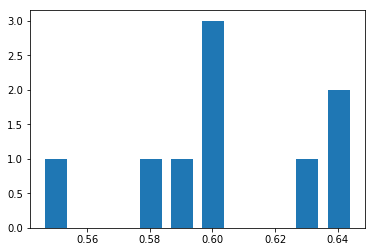

In [0]:
plt.hist(hist, rwidth = 0.7)

In [0]:
df2 = pow(data_test_fail - f_decoded_imgs,2)
df = df2**0.5
print(df.shape)

(9, 266, 410, 1)


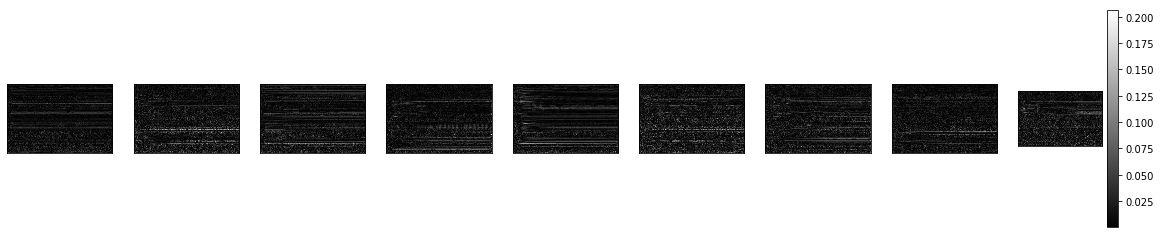

In [0]:
n = 9  # 몇 개의 숫자를 나타낼 것인지
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 데이터
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(df[i].reshape(266,410))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.colorbar()